In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("reduced_loan.csv")

# Leave clean cols
for base, alt in [
    ('verification_status', 'verification_status.1'),
    ('application_type', 'application_type.1'),
    ('initial_list_status', 'initial_list_status.1'),
    ('purpose', 'purpose.1'),
]:
      if base in df.columns and alt in df.columns:
        df[base] = df[base].fillna(df[alt])
        df = df.drop(columns=[alt])

In [3]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies
0,35000,36 months,12.12,1164.51,B,B3,Legacy Physicians Group,< 1 year,RENT,90000.0,...,Nov-1997,14.0,0.0,1347,8.1,22.0,w,Individual,1.0,0.0
1,30000,60 months,10.75,648.54,B,B4,Director of nursing,2 years,RENT,100000.0,...,Jun-2011,17.0,0.0,29780,52.7,25.0,f,Individual,0.0,0.0
2,15000,36 months,7.49,466.53,A,A4,Partner,5 years,OWN,100000.0,...,Apr-1996,16.0,0.0,7425,10.3,25.0,w,Individual,1.0,0.0
3,24000,60 months,21.15,651.31,E,E2,Einstein Bros. Bagels,5 years,RENT,58000.0,...,Aug-1998,10.0,0.0,24123,72.2,15.0,f,Individual,0.0,0.0
4,14400,36 months,8.59,455.18,A,A5,Nurse practitioner,3 years,MORTGAGE,90000.0,...,Dec-2003,19.0,0.0,16615,49.9,48.0,w,Individual,1.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202540 entries, 0 to 202539
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             202540 non-null  int64  
 1   term                  202540 non-null  object 
 2   int_rate              202540 non-null  float64
 3   installment           202540 non-null  float64
 4   grade                 202540 non-null  object 
 5   sub_grade             202540 non-null  object 
 6   emp_title             202540 non-null  object 
 7   emp_length            202540 non-null  object 
 8   home_ownership        202540 non-null  object 
 9   annual_inc            202540 non-null  float64
 10  verification_status   202540 non-null  object 
 11  issue_d               202540 non-null  object 
 12  loan_status           202540 non-null  object 
 13  purpose               202540 non-null  object 
 14  title                 202540 non-null  object 
 15  

### 1. Exploratory Data Analysis

To select which variables are important to test the model and visualization

keep only the rows where loan_status is either "Fully Paid" or "Charged Off"

In [5]:
df = df[df['loan_status'].isin(['Fully Paid', 'Charged Off'])]

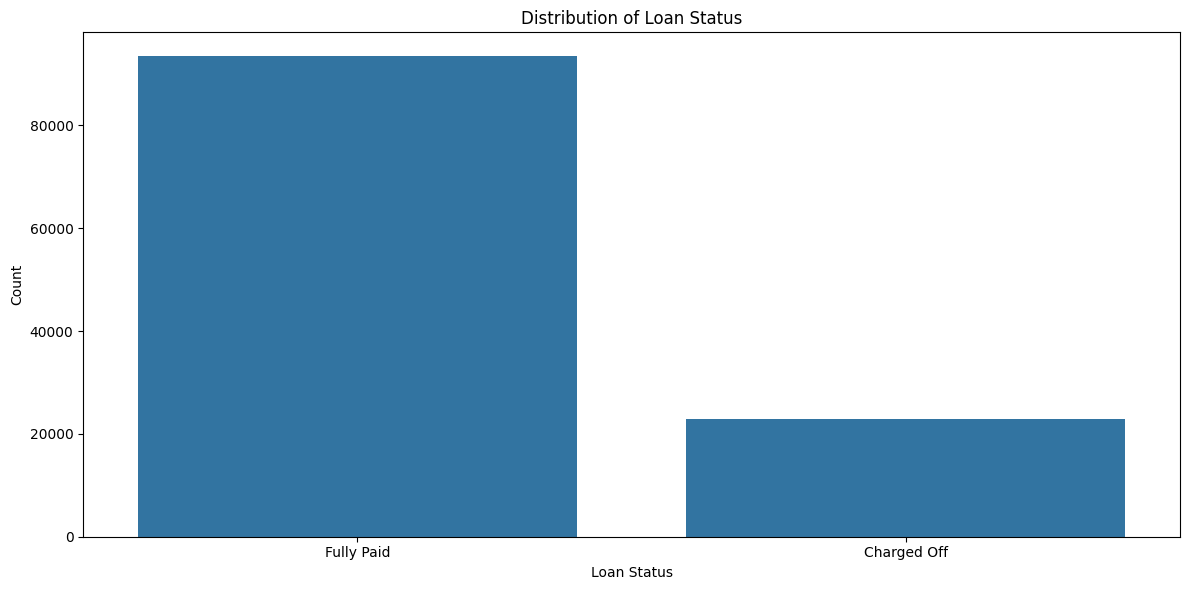

In [6]:
plt.figure(figsize=(12,6))
sns.countplot(x='loan_status', data=df)

plt.title('Distribution of Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')

plt.tight_layout() 
plt.show()


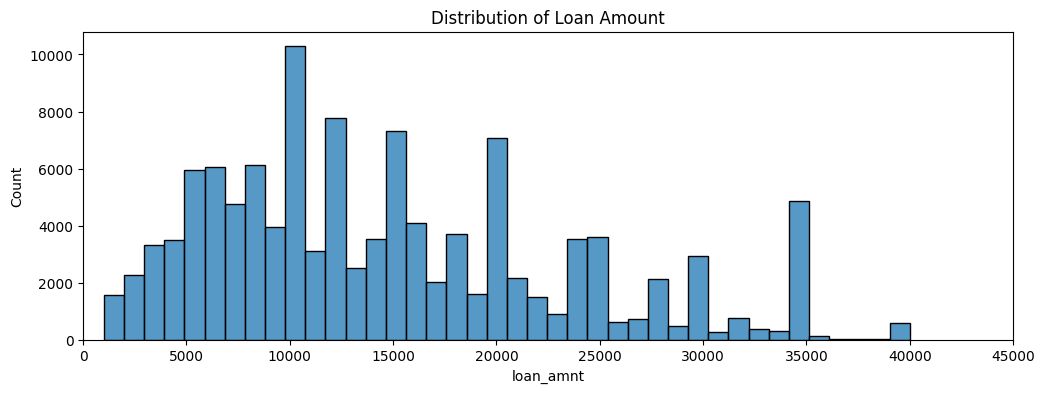

In [7]:
# Creating a histogram of the loan_amnt column.
plt.figure(figsize=(12,4))
sns.histplot(df['loan_amnt'], kde=False, bins=40)
plt.xlim(0, 45000)
plt.title("Distribution of Loan Amount")
plt.show()


Find the correlation between the feature variables and calculation

In [8]:
df.corr(numeric_only=True)

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.142038,0.953373,0.283304,0.028524,0.173490,-0.065951,0.305995,0.106559,0.200843,0.227682,-0.097505
int_rate,0.142038,1.000000,0.152697,-0.070209,0.172709,-0.004916,0.053302,-0.028147,0.232809,-0.040755,-0.083000,0.059891
installment,0.953373,0.152697,1.000000,0.274317,0.031592,0.163835,-0.054593,0.294432,0.122868,0.178827,0.193105,-0.089643
annual_inc,0.283304,-0.070209,0.274317,1.000000,-0.166833,0.110146,-0.003773,0.245256,0.022608,0.151455,0.201249,-0.041389
dti,0.028524,0.172709,0.031592,-0.166833,1.000000,0.284230,-0.049591,0.127990,0.174228,0.218099,-0.043327,-0.032036
open_acc,0.173490,-0.004916,0.163835,0.110146,0.284230,1.000000,-0.022798,0.205630,-0.146439,0.701312,0.115894,-0.027410
pub_rec,-0.065951,0.053302,-0.054593,-0.003773,-0.049591,-0.022798,1.000000,-0.091325,-0.069040,0.001100,-0.004736,0.659550
revol_bal,0.305995,-0.028147,0.294432,0.245256,0.127990,0.205630,-0.091325,1.000000,0.221369,0.174664,0.199205,-0.113192
revol_util,0.106559,0.232809,0.122868,0.022608,0.174228,-0.146439,-0.069040,0.221369,1.000000,-0.109893,0.028239,-0.084484
total_acc,0.200843,-0.040755,0.178827,0.151455,0.218099,0.701312,0.001100,0.174664,-0.109893,1.000000,0.359945,0.029213


Using heatmap to visualise the correlation

(10.0, 0.0)

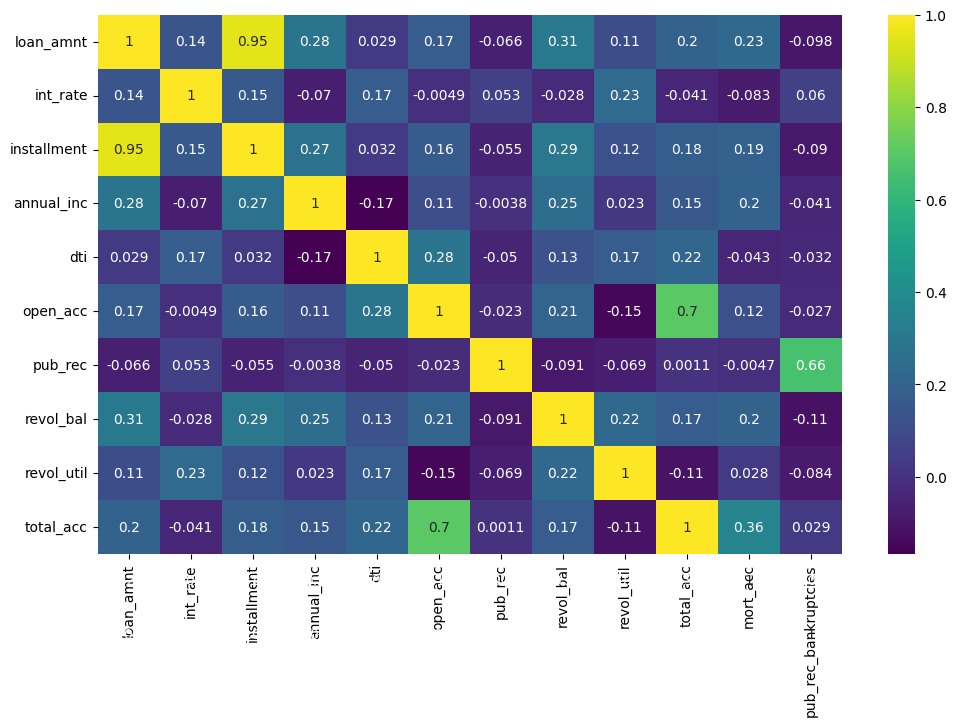

In [9]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='viridis')
plt.ylim(10, 0)


the above heatmap shows the correlation of various variables and they are hard to define. 

Create the scatter plot to visualize the relationship between monthly installment and total loan amount by the borrower

<Axes: xlabel='installment', ylabel='loan_amnt'>

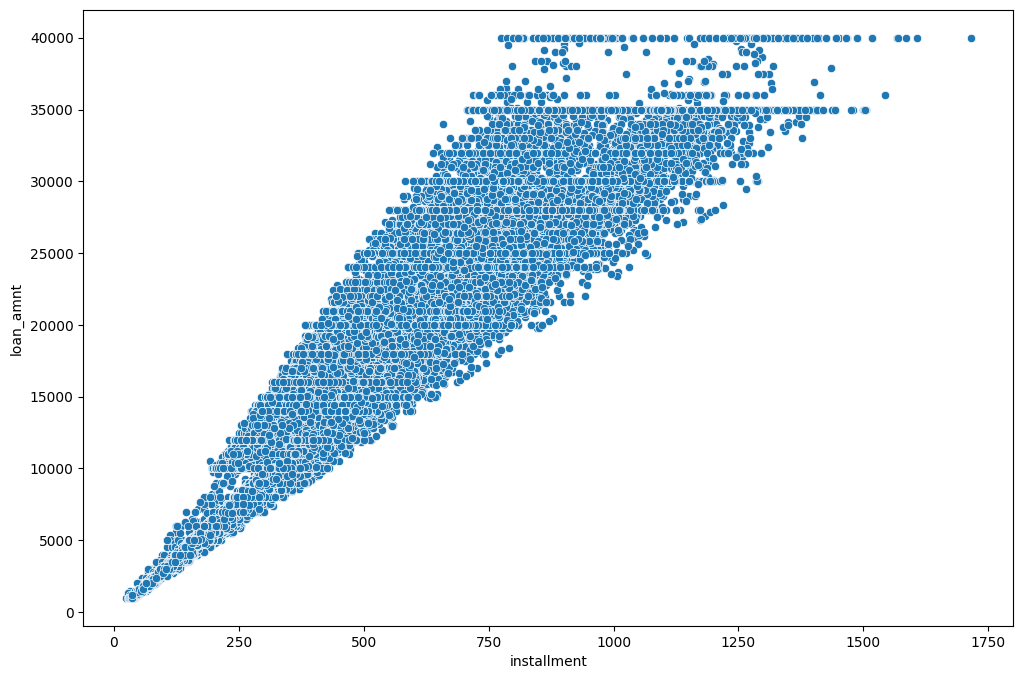

In [10]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='installment', y='loan_amnt', data=df)


Create a boxplot showing the relationship between the loan_status and the Loan Amount

([0, 1], [Text(0, 0, 'Fully Paid'), Text(1, 0, 'Charged Off')])

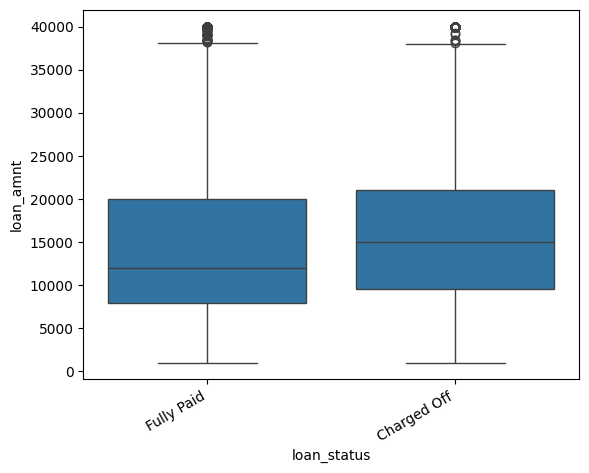

In [11]:
sns.boxplot(x='loan_status',y='loan_amnt',data=df)
plt.xticks(rotation=30, ha='right')


Summarize statistics for the loan amount, grouped by the loan_status

In [12]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,22842.0,15939.867350,8792.473412,1000.0,9600.0,15000.0,21000.0,40000.0
Fully Paid,93421.0,14385.231104,8722.968039,1000.0,7925.0,12000.0,20000.0,40000.0


Explaination:

For Charged Off:
- Higher average loan amount.
- These are borrowers who defaulted and failed to fully repay their loans.
- Median also higher than Fully Paid → consistently larger loans.

For Fully Paid:
- Slightly lower average loan amount.
- Borrowers successfully repaid in full.
- Median loan amount → suggests more borrowers took smaller loans.
- Standard Deviation (Both Groups) indicating wide variation in loan amounts for both categories. Similar spread shows diversity in loan sizes regardless of repayment status.
- Minimum and Maximum: Range is consistent showing the loan program's limits are the same across categories.

Insights: 
- Borrowers who defaulted (Charged Off) tend to take out bigger loans on average than those who fully repaid.
- The distribution is right-skewed, as the mean is higher than the median in both categories — indicating some high-value outlier loans.
- Larger loans are riskier: higher average and median in defaulted group suggests a correlation between loan size and repayment difficulty.
- Loan repayment behavior varies with amount: borrowers with smaller loans may find it easier to repay fully.
- Consistent variability in both groups’ loan amounts may imply other risk factors are involved beyond just loan size (e.g., credit history, income).

Look at Grade and SubGrade columns to attribute to the loans.

In [13]:
sorted(df['grade'].unique())

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [14]:
sorted(df['sub_grade'].unique())

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

Create a countplot per grade and set loan_status label

<Axes: xlabel='grade', ylabel='count'>

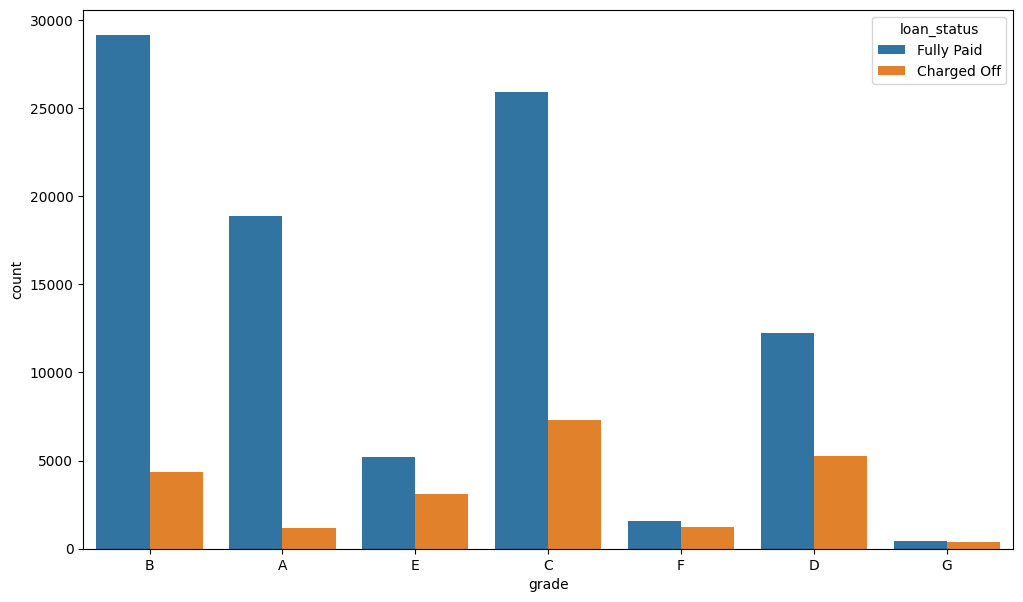

In [15]:
plt.figure(figsize=(12,7))
sns.countplot(x='grade',data=df,hue='loan_status')

plotting a count plot per subgrade

/var/folders/89/428dj6614wz4tc9szjgshvdm0000gn/T/ipykernel_56878/3676733108.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sub_grade',data=df,order = subgrade_order,palette='coolwarm' )


<Axes: xlabel='sub_grade', ylabel='count'>

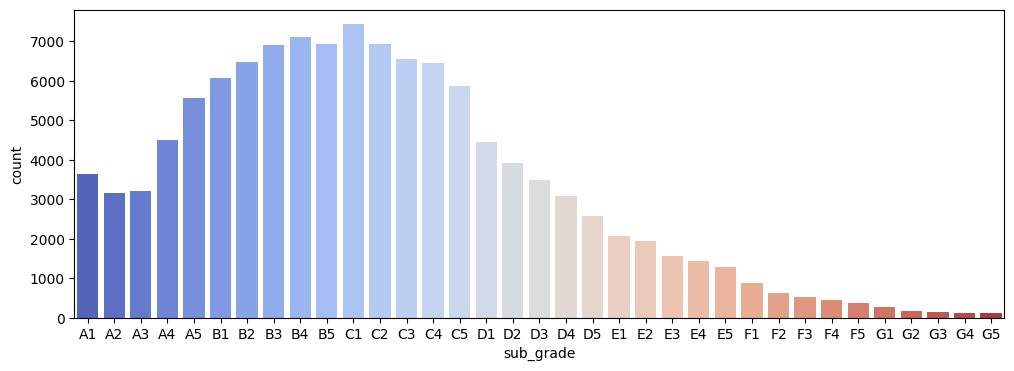

In [16]:
plt.figure(figsize=(12,4))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,order = subgrade_order,palette='coolwarm' )

loan status sub grade wise

<Axes: xlabel='sub_grade', ylabel='count'>

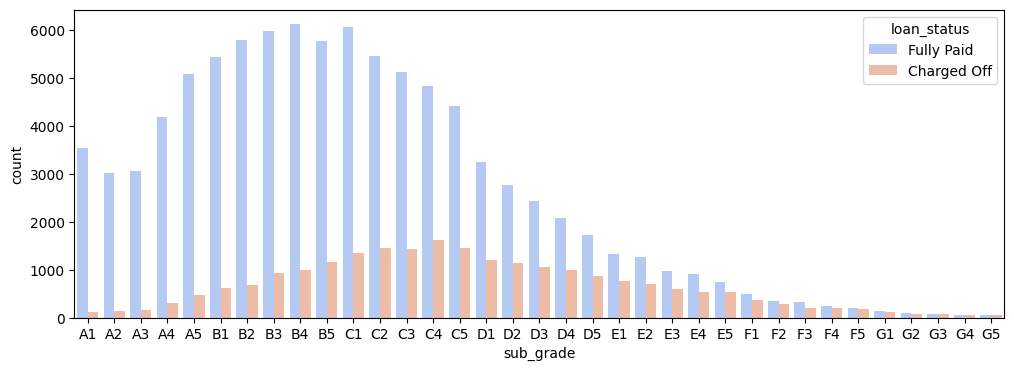

In [17]:
plt.figure(figsize=(12,4))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,order = subgrade_order,palette='coolwarm' ,hue='loan_status')

Create a new column called 'load_repaid' which will contain a 1 if the loan status was "Fully Paid" and a 0 if it was "Charged Off".

In [18]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [19]:
df['loan_repaid'] = df['loan_status'].map({'Fully Paid': 1, 'Charged Off': 0})

df[['loan_status', 'loan_repaid']].head()


,loan_status,loan_repaid
0,Fully Paid,1
2,Fully Paid,1
3,Fully Paid,1
5,Fully Paid,1
7,Fully Paid,1


Creating a bar plot showing the correlation of the numeric features to the new loan_repaid column

<Figure size 1200x700 with 0 Axes>

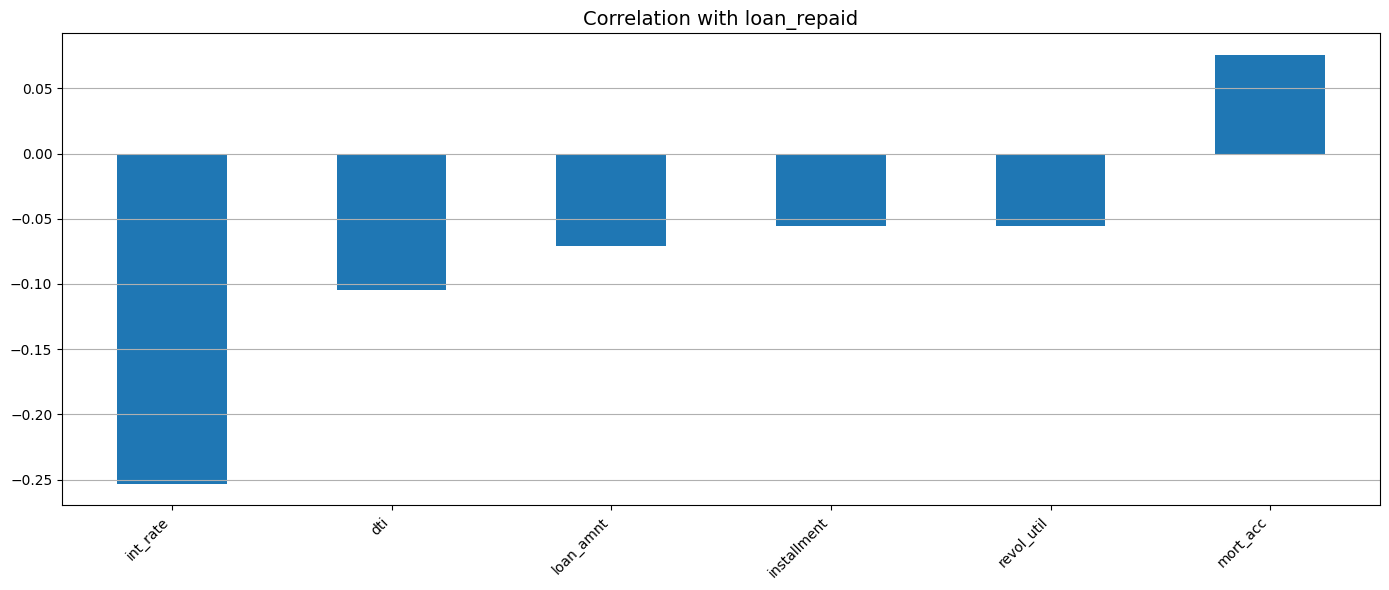

In [20]:
plt.figure(figsize=(12, 7))
numeric_df = df.select_dtypes(include=['number'])
corr_values = numeric_df.corr()['loan_repaid'].drop('loan_repaid')

filtered_corr = corr_values[abs(corr_values) > 0.05].sort_values()
plt.figure(figsize=(14, 6))
filtered_corr.plot(kind='bar')
plt.title("Correlation with loan_repaid", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


### 2. Data Pre Processing

Remove or fill any missing data. Remove unnecessary or repetitive features. Convert categorical string features to dummy variables.

In [21]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,loan_repaid
0,35000,36 months,12.12,1164.51,B,B3,Legacy Physicians Group,< 1 year,RENT,90000.0,...,14.0,0.0,1347,8.1,22.0,w,Individual,1.0,0.0,1
2,15000,36 months,7.49,466.53,A,A4,Partner,5 years,OWN,100000.0,...,16.0,0.0,7425,10.3,25.0,w,Individual,1.0,0.0,1
3,24000,60 months,21.15,651.31,E,E2,Einstein Bros. Bagels,5 years,RENT,58000.0,...,10.0,0.0,24123,72.2,15.0,f,Individual,0.0,0.0,1
5,5000,36 months,9.93,161.18,B,B2,Accountant,< 1 year,RENT,46750.0,...,8.0,0.0,5449,13.2,11.0,w,Individual,0.0,0.0,1
7,6550,36 months,24.74,259.53,E,E3,Over night stocker,9 years,MORTGAGE,42000.0,...,3.0,0.0,4751,60.9,8.0,f,Individual,1.0,0.0,1


### 3.Missing Data

Use the factors to decide wherte the data columns would be useful in order to keep, discard or fill the missing data

In [22]:
len(df)

116263

Create a series that displays the total count of missing values per column

In [23]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_title               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
title                   0
zip_code                0
addr_state              0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
loan_repaid             0
dtype: int64

Converting this Series to be in term of percentage of the total DataFrame

In [24]:
100*df.isnull().sum()/len(df)


loan_amnt               0.0
term                    0.0
int_rate                0.0
installment             0.0
grade                   0.0
sub_grade               0.0
emp_title               0.0
emp_length              0.0
home_ownership          0.0
annual_inc              0.0
verification_status     0.0
issue_d                 0.0
loan_status             0.0
purpose                 0.0
title                   0.0
zip_code                0.0
addr_state              0.0
dti                     0.0
earliest_cr_line        0.0
open_acc                0.0
pub_rec                 0.0
revol_bal               0.0
revol_util              0.0
total_acc               0.0
initial_list_status     0.0
application_type        0.0
mort_acc                0.0
pub_rec_bankruptcies    0.0
loan_repaid             0.0
dtype: float64

examine emp_title and emp_length to see whether it will be okay to drop them.

In [25]:
print(df.columns)


Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'earliest_cr_line', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'loan_repaid'],
      dtype='object')


In [26]:
df['emp_title'].nunique()

51779

In [27]:
df['emp_title'].value_counts()

emp_title
Teacher                  1956
Manager                  1814
Owner                     944
Registered Nurse          857
RN                        855
                         ... 
Network Systems Chief       1
Sea Ranch                   1
inventory associate         1
Sr Accoutant                1
Transition Coach            1
Name: count, Length: 51779, dtype: int64

Since there are too many job titles to try to convert this to a dummy variable feature. Let's remove that emp_title column.

In [28]:
df = df.drop('emp_title',axis=1)

Create a count plot of the emp_length feature column.

In [29]:
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [30]:
emp_length_order = [ '< 1 year',
                      '1 year',
                     '2 years',
                     '3 years',
                     '4 years',
                     '5 years',
                     '6 years',
                     '7 years',
                     '8 years',
                     '9 years',
                     '10+ years']

<Axes: xlabel='emp_length', ylabel='count'>

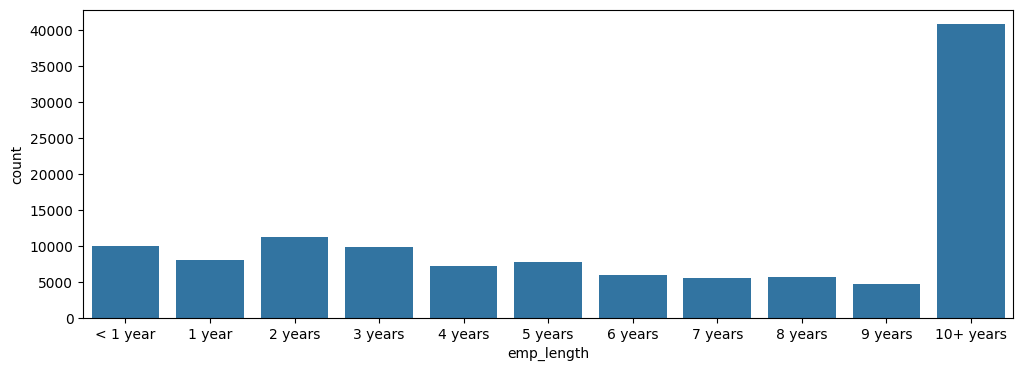

In [31]:
plt.figure(figsize=(12,4))

sns.countplot(x='emp_length',data=df,order=emp_length_order)

Plotting out the countplot with a hue separating Fully Paid vs Charged Off

<Axes: xlabel='emp_length', ylabel='count'>

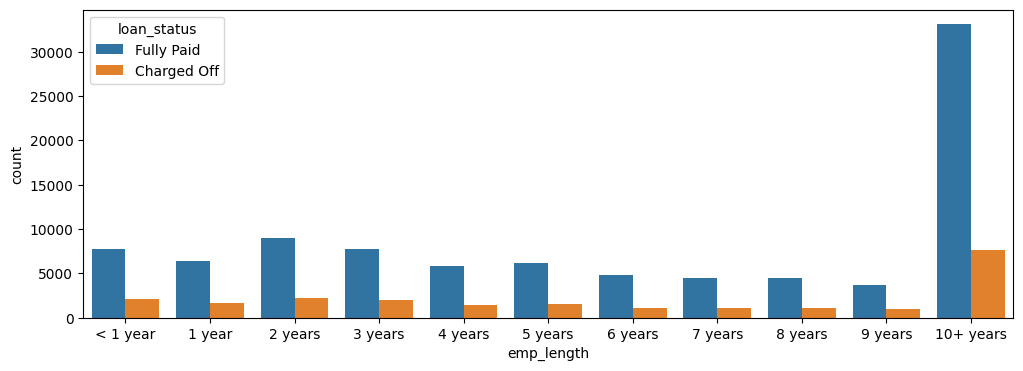

In [32]:
plt.figure(figsize=(12,4))
sns.countplot(x='emp_length',data=df,order=emp_length_order,hue='loan_status')

the chart does not really confirm of the strong relationship between the length and being charged off, what we need is the percentage of charge offs per category, to confirm what percentage of borrowers per employment category didn't pay back the loan.

In [33]:
emp_co = df[df['loan_status']=="Charged Off"].groupby("emp_length").count()['loan_status']

In [34]:
emp_fp = df[df['loan_status']=="Fully Paid"].groupby("emp_length").count()['loan_status']

In [35]:
emp_len = emp_co/emp_fp

In [36]:
emp_len

emp_length
1 year       0.256664
10+ years    0.230906
2 years      0.251143
3 years      0.251508
4 years      0.252555
5 years      0.243151
6 years      0.233717
7 years      0.242165
8 years      0.247009
9 years      0.257840
< 1 year     0.272926
Name: loan_status, dtype: float64

<Axes: xlabel='emp_length'>

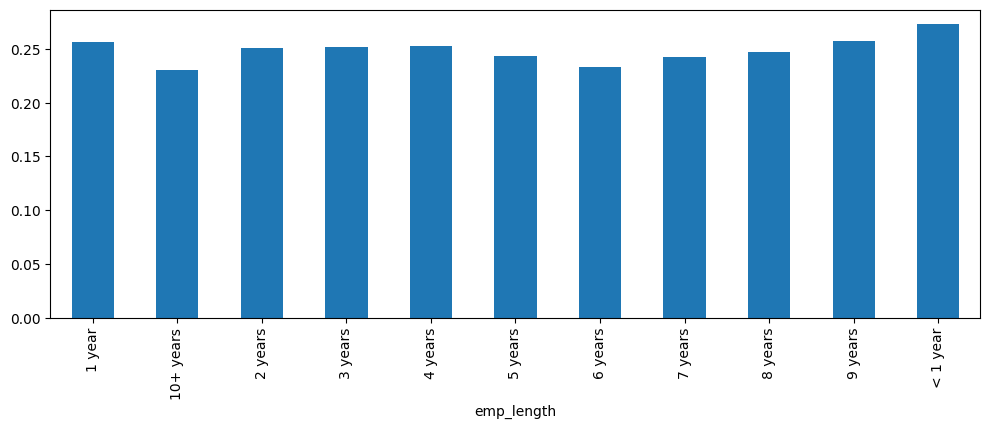

In [37]:
plt.figure(figsize=(12,4))
emp_len.plot(kind='bar')

Thus, the charge off rates are similar across all employment lengths, the emp_length column will be dropped 

In [38]:
df = df.drop('emp_length',axis=1)

In [39]:
#Revisit the DataFrame to see what feature columns still have missing data.
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
title                   0
zip_code                0
addr_state              0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
loan_repaid             0
dtype: int64

In [41]:
df['title'].head(20)

0              Hospital Debt 
2                    Business
3          Debt Consolidation
5     Credit card refinancing
7                       Other
8          bill consolidation
11         Debt consolidation
12    Credit card refinancing
14         Debt consolidation
15         Debt consolidation
18    Debt Consolidation Loan
20             Major purchase
21    Credit card refinancing
22         Debt consolidation
23    Credit card refinancing
24         Debt consolidation
25           Home improvement
27         Debt consolidation
29         Debt consolidation
30                      Other
Name: title, dtype: object

The title column is simply a string subcategory/description of the purpose column. we can go ahead and drop the title column.

In [42]:
df=df.drop('title',axis=1)

In [43]:
#Revisit the DataFrame to see what feature columns still have missing data.
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
zip_code                0
addr_state              0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
loan_repaid             0
dtype: int64

In [44]:
df['mort_acc'].value_counts()

mort_acc
0.0     47016
1.0     20421
2.0     16863
3.0     12374
4.0      8498
5.0      5086
6.0      2902
7.0      1545
8.0       720
9.0       387
10.0      183
11.0      114
12.0       56
13.0       31
14.0       26
15.0        9
16.0        7
18.0        6
17.0        5
19.0        5
23.0        2
20.0        2
21.0        1
25.0        1
24.0        1
22.0        1
34.0        1
Name: count, dtype: int64

review the other columsn to see which most highly correlates to mort_acc

In [46]:
print("Correlation with the mort_acc column")
df.corr(numeric_only=True)['mort_acc'].sort_values()

Correlation with the mort_acc column


int_rate               -0.083000
dti                    -0.043327
pub_rec                -0.004736
pub_rec_bankruptcies    0.009219
revol_util              0.028239
loan_repaid             0.075703
term                    0.103386
open_acc                0.115894
installment             0.193105
revol_bal               0.199205
annual_inc              0.201249
loan_amnt               0.227682
total_acc               0.359945
mort_acc                1.000000
Name: mort_acc, dtype: float64

it seems the total_acc feature correlates with the mort_acc ,now we try this fillna() approach. We will group the dataframe by the total_acc and calculate the mean value for the mort_acc per total_acc entry. To get the result below:

In [47]:
print("Mean of mort_acc column per total_acc")
df.select_dtypes(include='number').groupby(df['total_acc']).mean()['mort_acc']

Mean of mort_acc column per total_acc


total_acc
2.0      0.000000
3.0      0.025000
4.0      0.080692
5.0      0.133884
6.0      0.168050
           ...   
116.0    2.000000
120.0    0.000000
124.0    1.000000
130.0    3.000000
133.0    3.000000
Name: mort_acc, Length: 109, dtype: float64

we fill in the missing mort_acc values based on their total_acc value. If the mort_acc is missing, then we will fill in that missing value with the mean value corresponding to its total_acc value from the Series we created above. This involves using an .apply() method with two columns.

In [48]:
total_acc_avg = df.groupby('total_acc')['mort_acc'].mean()

In [49]:
total_acc_avg

total_acc
2.0      0.000000
3.0      0.025000
4.0      0.080692
5.0      0.133884
6.0      0.168050
           ...   
116.0    2.000000
120.0    0.000000
124.0    1.000000
130.0    3.000000
133.0    3.000000
Name: mort_acc, Length: 109, dtype: float64

In [50]:
total_acc_avg[2.0]

0.0

In [ ]:
# the total_acc and mort_acc values are accepted for the row. If the mort_acc is NaN , it returns the avg mort_acc value for the corresponding total_acc value for that row. total_acc_avg here should be a Series or dictionary containing the mapping of the groupby averages of mort_acc per total_acc values.

def fill_mort_acc(total_acc,mort_acc):

    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [52]:
df['mort_acc'] = df['mort_acc'].fillna(df['total_acc'].map(total_acc_avg))

In [53]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
zip_code                0
addr_state              0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
loan_repaid             0
dtype: int64

### 4. Categorical Variables and Dummy Variables

 Now we need to deal with the string values due to the categorical columns.

In [56]:
df.select_dtypes(['object']).columns

Index(['grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'zip_code', 'addr_state',
       'earliest_cr_line', 'initial_list_status', 'application_type'],
      dtype='object')

### term feature
Convert the term feature into either a 36 or 60 integer numeric data type using .apply() or .map().**

In [57]:
df['term'].value_counts()

term
36    87747
60    28516
Name: count, dtype: int64

In [58]:
df['term'] = df['term'].astype(str).str.replace(' months', '').astype(int)

### grade feature
We already know grade is part of sub_grade, so just drop the grade feature.

In [59]:
print(df.columns)

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'zip_code', 'addr_state', 'dti',
       'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'loan_repaid'],
      dtype='object')


In [60]:
df = df.drop('grade', axis=1, errors='ignore')


Convert the subgrade into dummy variables. Then concatenate these new columns to the original dataframe. drop the original subgrade column and to add drop_first=True to get_dummies call.

In [61]:
df.columns = df.columns.str.strip()

if 'sub_grade' in df.columns:
    subgrade_dummies = pd.get_dummies(df['sub_grade'], prefix='sub_grade', drop_first=True)
    df = pd.concat([df.drop(columns=['sub_grade']), subgrade_dummies], axis=1)

In [62]:
df.select_dtypes(['object']).columns

Index(['home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'zip_code', 'addr_state', 'earliest_cr_line',
       'initial_list_status', 'application_type'],
      dtype='object')

### verification_status, application_type,initial_list_status,purpose
Convert these columns: ['verification_status', 'application_type','initial_list_status','purpose'] into dummy variables and concatenate them with the original dataframe. set drop_first=True and to drop the original columns.

In [63]:
print("Current columns in df:", df.columns.tolist())

Current columns in df: ['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'zip_code', 'addr_state', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'loan_repaid', 'sub_grade_A2', 'sub_grade_A3', 'sub_grade_A4', 'sub_grade_A5', 'sub_grade_B1', 'sub_grade_B2', 'sub_grade_B3', 'sub_grade_B4', 'sub_grade_B5', 'sub_grade_C1', 'sub_grade_C2', 'sub_grade_C3', 'sub_grade_C4', 'sub_grade_C5', 'sub_grade_D1', 'sub_grade_D2', 'sub_grade_D3', 'sub_grade_D4', 'sub_grade_D5', 'sub_grade_E1', 'sub_grade_E2', 'sub_grade_E3', 'sub_grade_E4', 'sub_grade_E5', 'sub_grade_F1', 'sub_grade_F2', 'sub_grade_F3', 'sub_grade_F4', 'sub_grade_F5', 'sub_grade_G1', 'sub_grade_G2', 'sub_grade_G3', 'sub_grade_G4', 'sub_grade_G5']


In [64]:
# Columns we want to encode
base_cols = ['verification_status', 'application_type', 'initial_list_status', 'purpose']

# Find which of these columns actually exist in df (including possible ".1" versions)
cols_to_encode = [c for c in df.columns if c in base_cols or c.replace('.1', '') in base_cols]

# Only proceed if there are valid columns to encode
if cols_to_encode:
    # One-hot encode the selected columns
    dummies = pd.get_dummies(df[cols_to_encode], drop_first=True)

    # Drop the original categorical columns
    df = df.drop(cols_to_encode, axis=1)

    # Remove any duplicate columns from dummies (safety check)
    dummies = dummies.loc[:, ~dummies.columns.duplicated()]

    # Concatenate the encoded columns back to df
    df = pd.concat([df, dummies], axis=1)


In [65]:
print(df.columns.tolist())


['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership', 'annual_inc', 'issue_d', 'loan_status', 'zip_code', 'addr_state', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc', 'pub_rec_bankruptcies', 'loan_repaid', 'sub_grade_A2', 'sub_grade_A3', 'sub_grade_A4', 'sub_grade_A5', 'sub_grade_B1', 'sub_grade_B2', 'sub_grade_B3', 'sub_grade_B4', 'sub_grade_B5', 'sub_grade_C1', 'sub_grade_C2', 'sub_grade_C3', 'sub_grade_C4', 'sub_grade_C5', 'sub_grade_D1', 'sub_grade_D2', 'sub_grade_D3', 'sub_grade_D4', 'sub_grade_D5', 'sub_grade_E1', 'sub_grade_E2', 'sub_grade_E3', 'sub_grade_E4', 'sub_grade_E5', 'sub_grade_F1', 'sub_grade_F2', 'sub_grade_F3', 'sub_grade_F4', 'sub_grade_F5', 'sub_grade_G1', 'sub_grade_G2', 'sub_grade_G3', 'sub_grade_G4', 'sub_grade_G5', 'verification_status_Source Verified', 'verification_status_Verified', 'purpose_credit_card', 'purpose_debt_consolidation', 'purpose_home_improvement', 'purpose_house', 'purpose_majo

### home_ownership
Review the value_counts for the home_ownership column.

In [66]:
df['home_ownership'].value_counts()

home_ownership
MORTGAGE    57826
RENT        46474
OWN         11934
ANY            20
OTHER           5
NONE            4
Name: count, dtype: int64

We need to convert these to dummy variables, but replace NONE and ANY with OTHER, so that we end up with just 4 categories, MORTGAGE, RENT, OWN, OTHER. Then concatenate them with the original dataframe. set drop_first=True and to drop the original columns.

In [67]:
print(df.columns.tolist())


['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership', 'annual_inc', 'issue_d', 'loan_status', 'zip_code', 'addr_state', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc', 'pub_rec_bankruptcies', 'loan_repaid', 'sub_grade_A2', 'sub_grade_A3', 'sub_grade_A4', 'sub_grade_A5', 'sub_grade_B1', 'sub_grade_B2', 'sub_grade_B3', 'sub_grade_B4', 'sub_grade_B5', 'sub_grade_C1', 'sub_grade_C2', 'sub_grade_C3', 'sub_grade_C4', 'sub_grade_C5', 'sub_grade_D1', 'sub_grade_D2', 'sub_grade_D3', 'sub_grade_D4', 'sub_grade_D5', 'sub_grade_E1', 'sub_grade_E2', 'sub_grade_E3', 'sub_grade_E4', 'sub_grade_E5', 'sub_grade_F1', 'sub_grade_F2', 'sub_grade_F3', 'sub_grade_F4', 'sub_grade_F5', 'sub_grade_G1', 'sub_grade_G2', 'sub_grade_G3', 'sub_grade_G4', 'sub_grade_G5', 'verification_status_Source Verified', 'verification_status_Verified', 'purpose_credit_card', 'purpose_debt_consolidation', 'purpose_home_improvement', 'purpose_house', 'purpose_majo

In [68]:
if 'home_ownership' in df.columns:  
    df['home_ownership'] = df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

    dummies = pd.get_dummies(df['home_ownership'], prefix="home_ownership", drop_first=True)

    df = pd.concat([df.drop('home_ownership', axis=1), dummies], axis=1)
else:
    print("Column 'home_ownership' not found, maybe already dummy encoded.")

In [69]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'issue_d',
       'loan_status', 'zip_code', 'addr_state', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies', 'loan_repaid', 'sub_grade_A2',
       'sub_grade_A3', 'sub_grade_A4', 'sub_grade_A5', 'sub_grade_B1',
       'sub_grade_B2', 'sub_grade_B3', 'sub_grade_B4', 'sub_grade_B5',
       'sub_grade_C1', 'sub_grade_C2', 'sub_grade_C3', 'sub_grade_C4',
       'sub_grade_C5', 'sub_grade_D1', 'sub_grade_D2', 'sub_grade_D3',
       'sub_grade_D4', 'sub_grade_D5', 'sub_grade_E1', 'sub_grade_E2',
       'sub_grade_E3', 'sub_grade_E4', 'sub_grade_E5', 'sub_grade_F1',
       'sub_grade_F2', 'sub_grade_F3', 'sub_grade_F4', 'sub_grade_F5',
       'sub_grade_G1', 'sub_grade_G2', 'sub_grade_G3', 'sub_grade_G4',
       'sub_grade_G5', 'verification_status_Source Verified',
       'verification_status_Verified', 'purpose_credit_card',
       'p

### issue_d
This would be data leakage, we wouldn't know beforehand whether or not a loan would be issued when using our model, so we drop issue_date feature.

In [70]:
df = df.drop('issue_d',axis=1)

### earliest_cr_line
This appears to be a historical time stamp feature. Extract the year from this feature using a .apply function, then convert it to a numeric feature. Set this new data to a feature column called 'earliest_cr_year'.Then drop the earliest_cr_line feature.

In [71]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda date:int(date[-4:]))
df = df.drop('earliest_cr_line',axis=1)     

In [72]:
df.head(5)

,loan_amnt,term,int_rate,installment,annual_inc,loan_status,zip_code,addr_state,dti,open_acc,...,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w,application_type_Joint App,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,earliest_cr_year
0,35000,36,12.12,1164.51,90000.0,Fully Paid,775xx,TX,3.51,14.0,...,False,False,False,False,True,False,False,False,True,1997
2,15000,36,7.49,466.53,100000.0,Fully Paid,210xx,MD,6.71,16.0,...,False,True,False,False,True,False,False,True,False,1996
3,24000,60,21.15,651.31,58000.0,Fully Paid,282xx,NC,15.50,10.0,...,False,False,False,False,False,False,False,False,True,1998
5,5000,36,9.93,161.18,46750.0,Fully Paid,085xx,NJ,11.09,8.0,...,False,False,False,False,True,False,False,False,True,2000
7,6550,36,24.74,259.53,42000.0,Fully Paid,444xx,OH,18.71,3.0,...,False,False,False,False,False,False,False,False,False,2006


addtionnally, funded_amnt and funded_amnt_inv columns are dropped as well.

In [73]:
df.head(5)

,loan_amnt,term,int_rate,installment,annual_inc,loan_status,zip_code,addr_state,dti,open_acc,...,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w,application_type_Joint App,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,earliest_cr_year
0,35000,36,12.12,1164.51,90000.0,Fully Paid,775xx,TX,3.51,14.0,...,False,False,False,False,True,False,False,False,True,1997
2,15000,36,7.49,466.53,100000.0,Fully Paid,210xx,MD,6.71,16.0,...,False,True,False,False,True,False,False,True,False,1996
3,24000,60,21.15,651.31,58000.0,Fully Paid,282xx,NC,15.50,10.0,...,False,False,False,False,False,False,False,False,True,1998
5,5000,36,9.93,161.18,46750.0,Fully Paid,085xx,NJ,11.09,8.0,...,False,False,False,False,True,False,False,False,True,2000
7,6550,36,24.74,259.53,42000.0,Fully Paid,444xx,OH,18.71,3.0,...,False,False,False,False,False,False,False,False,False,2006


### address
we feature engineer a zip code column from the address in the data set. Create a column called 'zip_code' that extracts the zip code from the address column.

In [74]:
df['zip_code'] = df['addr_state'].apply(lambda address:address[-5:])

Now make this zip_code column into dummy variables using pandas. Concatenate the result and drop the original zip_code column along with dropping the address column.

In [75]:
dummies = pd.get_dummies(df['zip_code'],drop_first=True)
df = df.drop(['zip_code','addr_state'],axis=1)
df = pd.concat([df,dummies],axis=1)

In [76]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc',
       'loan_status', 'dti', 'open_acc', 'pub_rec', 'revol_bal',
       ...
       'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'],
      dtype='object', length=118)

In [77]:
df.select_dtypes(['object']).columns

Index(['loan_status'], dtype='object')

## 5. Train Test Split

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import average_precision_score

/Users/auraw./Desktop/698/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [79]:
# Define KS Statistics function
def ks_statistics(y_true, y_score):
    fpr, tpr, _ = roc_curve(y_true, y_score)
    return float(np.max(tpr - fpr))

drop the load_status column we created earlier, since its a duplicate of the loan_repaid column. We'll use the loan_repaid column since its already in 0s and 1s.

In [80]:
df = df.drop('loan_status', axis =1)

## Normalizing the Data
Using a MinMaxScaler to normalize the feature data X_train and X_test. Recall we don't want data leakge from the test set so we only fit on the X_train data.

In [81]:
X = df.drop('loan_repaid', axis=1)
y = df['loan_repaid']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y.astype(int), test_size=0.2, random_state=42, stratify=y)


# Drop or encode non-numeric features BEFORE scaling
non_numeric_cols = X_train.select_dtypes(include=['object']).columns
print(non_numeric_cols)

# Drop them if already encoded
X_train = pd.get_dummies(X_train, columns=non_numeric_cols, drop_first=True)
X_test = pd.get_dummies(X_test, columns=non_numeric_cols, drop_first=True)

X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

# Scale
from sklearn.preprocessing import MinMaxScaler
scaler_mm = MinMaxScaler()
X_train_scaled_mm = scaler_mm.fit_transform(X_train)
X_test_scaled_mm = scaler_mm.transform(X_test)

# Impletement Wide & Deep

# Wide
X_train_wide = X_train.values.astype("float32")
X_test_wide = X_test.values.astype("float32")

# Deep: use the result from scaler
X_train_deep = X_train_scaled_mm.astype("float32")
X_test_deep = X_test_scaled_mm.astype("float32")


Index([], dtype='object')


### Creating the Model
Building a sequential model to be trained on the data. We have unlimited options here, but here is what the solution uses: a model that goes 78 --> 39 --> 19--> 1 output neuron.

In [ ]:
model = Sequential()


# input layer
model.add(Dense(78, activation='relu', input_shape=(X_train_scaled_mm.shape[1],)))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=[
        tf.keras.metrics.AUC(name='roc_auc', curve='ROC'),
        tf.keras.metrics.AUC(name='pr_auc',  curve='PR'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall'),
        tf.keras.metrics.BinaryAccuracy(name='accuracy')
    ]
)

/Users/auraw./Desktop/698/.venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-09-27 16:14:36.140803: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2025-09-27 16:14:36.140848: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-09-27 16:14:36.140855: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2025-09-27 16:14:36.140872: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-09-27 16:14:36.140883: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271]

### Create Wide & Deep Model

In [83]:
# Use Tensorflow
import tensorflow as tf
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Add

# Define 2 inputs
wide_in = Input(shape=(X_train_wide.shape[1],), name="wide_input")
deep_in = Input(shape=(X_train_deep.shape[1],), name="deep_input")

# Wide branch： liner logit
wide_logit = Dense(1, activation=None, name="wide_logit")(wide_in)

# Deep Branch: MLP
x = Dense(128, activation="relu")(deep_in)
x = Dropout(0.2)(x)
x = Dense(64, activation="relu")(x)
x = Dropout(0.2)(x)
deep_logit = Dense(1, activation=None, name="deep_logit")(x)

# Add logits, apply signmoid to get probabilities
sum_logit = Add(name="sum_logits")([wide_logit, deep_logit])
prob = Activation("sigmoid", name="prob")(sum_logit)

wd_model = Model(inputs=[wide_in, deep_in], outputs=prob, name="WideAndDeep")

# Complie model
wd_model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=[
        tf.keras.metrics.AUC(name="roc_auc", curve="ROC"),
        tf.keras.metrics.AUC(name="pr_auc", curve="PR"),
        tf.keras.metrics.Precision(name="precision"),
        tf.keras.metrics.Recall(name="recall"),
        tf.keras.metrics.BinaryAccuracy(name="accuracy")
    ],
)


# get model summary
wd_model.summary()


Model: "WideAndDeep"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ deep_input          │ (None, 116)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 128)       │     14,976 │ deep_input[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 128)       │          0 │ dense_4[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 64)        │      8,256 │ dropout_3[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ wide_input          │ (None, 116)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_4 (Dropout) │ (None, 64)        │          0 │ dense_5[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ wide_logit (Dense)  │ (None, 1)         │        117 │ wide_input[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ deep_logit (Dense)  │ (None, 1)         │         65 │ dropout_4[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sum_logits (Add)    │ (None, 1)         │          0 │ wide_logit[0][0], │
│                     │                   │            │ deep_logit[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ prob (Activation)   │ (None, 1)         │          0 │ sum_logits[0][0]  │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 23,414 (91.46 KB)

 Trainable params: 23,414 (91.46 KB)

 Non-trainable params: 0 (0.00 B)

Fit the model to the training data for at least 25 epochs. Also add in the validation data for later plotting. add in a batch_size of 256.

In [84]:
from sklearn.utils.class_weight import compute_class_weight

classes = np.unique(y_train)
cw = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
class_weight_dict = {int (c): w for c, w in zip(classes, cw)}

model.fit(
    x=X_train_scaled_mm,
    y=y_train,
    epochs=25,
    batch_size=256,
    validation_data=(X_test_scaled_mm, y_test),
    class_weight = class_weight_dict
)


Epoch 1/25


2025-09-27 16:14:37.061843: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


364/364 ━━━━━━━━━━━━━━━━━━━━ 14s 33ms/step - accuracy: 0.5462 - loss: 0.6954 - pr_auc: 0.8541 - precision: 0.8505 - recall: 0.5280 - roc_auc: 0.6042 - val_accuracy: 0.6365 - val_loss: 0.6261 - val_pr_auc: 0.8966 - val_precision: 0.8809 - val_recall: 0.6332 - val_roc_auc: 0.6968
Epoch 2/25
364/364 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.6086 - loss: 0.6543 - pr_auc: 0.8840 - precision: 0.8733 - recall: 0.5993 - roc_auc: 0.6661 - val_accuracy: 0.5963 - val_loss: 0.6529 - val_pr_auc: 0.8986 - val_precision: 0.8899 - val_recall: 0.5679 - val_roc_auc: 0.7003
Epoch 3/25
364/364 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.6196 - loss: 0.6422 - pr_auc: 0.8906 - precision: 0.8779 - recall: 0.6124 - roc_auc: 0.6785 - val_accuracy: 0.6120 - val_loss: 0.6419 - val_pr_auc: 0.8991 - val_precision: 0.8865 - val_recall: 0.5930 - val_roc_auc: 0.7011
Epoch 4/25
364/364 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.6255 - loss: 0.6337 - pr_auc: 0.8967 - precision: 0.8827 - recall: 0.6174

In [85]:
# training: algin with the existing class_weight

history_wd = wd_model.fit(
    x=[X_train_wide, X_train_deep],
    y=y_train,
    epochs=25,
    batch_size=256,
    validation_data=([X_test_wide, X_test_deep], y_test),
    class_weight=class_weight_dict,
    verbose=1
)

Epoch 1/25
364/364 ━━━━━━━━━━━━━━━━━━━━ 13s 31ms/step - accuracy: 0.2406 - loss: 7263.8193 - pr_auc: 0.7974 - precision: 0.3868 - recall: 0.0769 - roc_auc: 0.4917 - val_accuracy: 0.5996 - val_loss: 57.3204 - val_pr_auc: 0.8033 - val_precision: 0.8029 - val_recall: 0.6649 - val_roc_auc: 0.4993
Epoch 2/25
364/364 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.5709 - loss: 35.4397 - pr_auc: 0.8109 - precision: 0.8130 - recall: 0.6063 - roc_auc: 0.5162 - val_accuracy: 0.4602 - val_loss: 8.6728 - val_pr_auc: 0.8600 - val_precision: 0.8875 - val_recall: 0.3759 - val_roc_auc: 0.6050
Epoch 3/25
364/364 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.5399 - loss: 9.2491 - pr_auc: 0.8293 - precision: 0.8333 - recall: 0.5362 - roc_auc: 0.5536 - val_accuracy: 0.5276 - val_loss: 4.8113 - val_pr_auc: 0.8705 - val_precision: 0.8849 - val_recall: 0.4737 - val_roc_auc: 0.6351
Epoch 4/25
364/364 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - accuracy: 0.5544 - loss: 5.6166 - pr_auc: 0.8372 - precision: 0.8405 

## Evaluating Model Performance.
Plot out the validation loss versus the training loss.

In [86]:
feature_cols = X_train.columns.tolist()

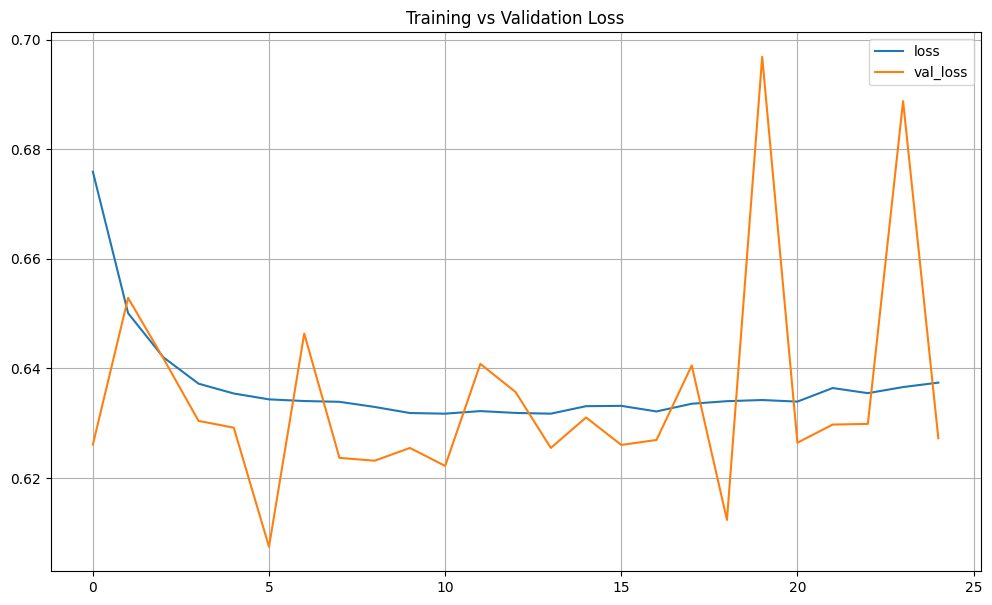

In [87]:
losses = pd.DataFrame(model.history.history)
losses[['loss','val_loss']].plot(figsize=(12,7))
plt.title('Training vs Validation Loss')
plt.grid(True)
plt.show()

Creating predictions from the X_test set and display a classification report and confusion matrix for the X_test set.

In [88]:
pred_prob = model.predict(X_test_scaled_mm).ravel()
pred_cls  = (pred_prob > 0.5).astype(int)

727/727 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [89]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_cls))

              precision    recall  f1-score   support

           0       0.31      0.66      0.42      4568
           1       0.88      0.63      0.74     18685

    accuracy                           0.64     23253
   macro avg       0.59      0.65      0.58     23253
weighted avg       0.77      0.64      0.68     23253



In [90]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred_cls)

array([[ 2999,  1569],
       [ 6827, 11858]])

In [91]:
random_index = np.random.randint(0, len(df))
new_customer = df.drop(['loan_repaid','loan_status'], axis=1, errors='ignore').iloc[[random_index]]

In [92]:
new_customer_encoded = pd.get_dummies(new_customer, drop_first=True)

if new_customer_encoded.columns.duplicated().any():
    new_customer_encoded = new_customer_encoded.loc[:, ~new_customer_encoded.columns.duplicated()]

train_cols = list(getattr(scaler_mm, "feature_names_in_", pd.Index(feature_cols).drop_duplicates()))

new_customer_aligned = new_customer_encoded.reindex(columns=train_cols, fill_value=0)

new_customer_scaled = scaler_mm.transform(new_customer_aligned)

pred_prob_one = model.predict(new_customer_scaled).ravel()[0]
pred_cls_one  = int(pred_prob_one > 0.5)
print("Predicted class:", pred_cls_one)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Predicted class: 0


In [93]:
# Now check, did this person actually end up paying back their loan?
actual = df.iloc[random_index]['loan_repaid']

727/727 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


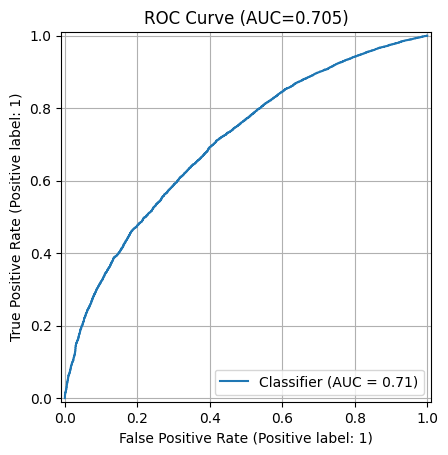

ROC-AUC Score: 0.7053065689017901


In [94]:
from sklearn.metrics import roc_auc_score, RocCurveDisplay
pred_prob = model.predict(X_test_scaled_mm).ravel()
ks = ks_statistics(y_test, pred_prob)
auc = roc_auc_score(y_test, pred_prob)
pr_auc = average_precision_score(y_test, pred_prob) 
RocCurveDisplay.from_predictions(y_test, pred_prob)
plt.title(f'ROC Curve (AUC={auc:.3f})')
plt.grid(True); plt.show()
print("ROC-AUC Score:", auc)

In [95]:
# Save Keras MLP result into results dict
results = {}

keras_probs = model.predict(X_test_scaled_mm).ravel()
keras_preds = (keras_probs > 0.5).astype(int)

results['Keras MLP (Class Weight)'] = {
    "report": classification_report(y_test, keras_preds, output_dict=True),
    "roc_auc": roc_auc_score(y_test, keras_probs),
    "pr_auc":  average_precision_score(y_test, keras_probs),
    "ks":      ks_statistics(y_test, keras_probs)
}

727/727 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


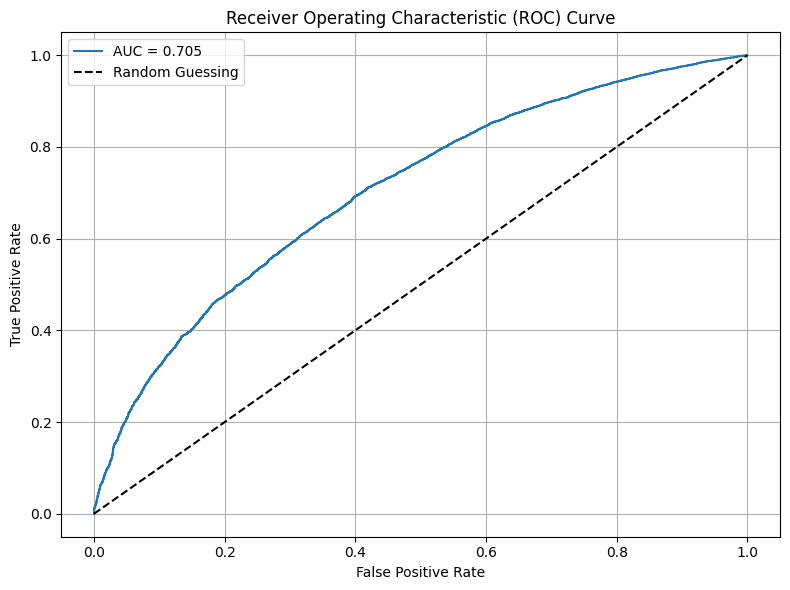

In [96]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, pred_prob)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
plt.plot([0,1], [0,1], 'k--', label="Random Guessing")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
from pprint import pprint


# 1. Logistic Regression Model

# Standardize the data
scaler_std = StandardScaler()
X_train_scaled_std = scaler_std.fit_transform(X_train)
X_test_scaled_std = scaler_std.transform(X_test)

# Logistic Regression
lr_model = LogisticRegression(max_iter=2000, solver='lbfgs', random_state=42, class_weight='balanced') # add class_weight
lr_model.fit(X_train_scaled_std, y_train)
lr_preds = lr_model.predict(X_test_scaled_std)
lr_probs = lr_model.predict_proba(X_test_scaled_std)[:, 1]
pr_auc = average_precision_score(y_test, lr_probs)

# Calculte KS
ks = ks_statistics(y_test, lr_probs)

# Store results
results['Logistic Regression (Class Weight)'] = {
    "report": classification_report(y_test, lr_preds, output_dict=True),
    "roc_auc": roc_auc_score(y_test, lr_probs),
    "pr_auc": average_precision_score(y_test, lr_probs),
    "ks": ks  #save ks
}

# Print results
print("== Logistic Regression Report ==")
pprint(results['Logistic Regression (Class Weight)']['report'])
print("ROC-AUC Score:", results['Logistic Regression (Class Weight)']['roc_auc'])

# Quick AUC print
print("Quick AUC:", roc_auc_score(y_test, lr_probs))


== Logistic Regression Report ==
{'0': {'f1-score': 0.4168887067021931,
       'precision': 0.3030092362697388,
       'recall': 0.667907180385289,
       'support': 4568.0},
 '1': {'f1-score': 0.7321848818601149,
       'precision': 0.884936286407767,
       'recall': 0.6244046026224244,
       'support': 18685.0},
 'accuracy': 0.6329505870210296,
 'macro avg': {'f1-score': 0.574536794281154,
               'precision': 0.5939727613387529,
               'recall': 0.6461558915038567,
               'support': 23253.0},
 'weighted avg': {'f1-score': 0.6702456513039979,
                  'precision': 0.7706180150006148,
                  'recall': 0.6329505870210296,
                  'support': 23253.0}}
ROC-AUC Score: 0.7115653354278486
Quick AUC: 0.7115653354278486


In [ ]:
#2. Random Forest Model

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from pprint import pprint

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

# Predict class labels and probabilities
rf_preds = rf_model.predict(X_test)
rf_probs = rf_model.predict_proba(X_test)[:, 1]
pr_auc = average_precision_score(y_test, rf_probs)

ks = ks_statistics(y_test, rf_probs)

# Save evaluation results into the `results` dictionary
results['Random Forest (Class Weight)'] = {
    "report": classification_report(y_test, rf_preds, output_dict=True),
    "roc_auc": roc_auc_score(y_test, rf_probs),
    "pr_auc": average_precision_score(y_test, rf_probs),
    "ks": ks
}

# Print the results
print("== Random Forest Report ==")
pprint(results['Random Forest (Class Weight)']['report'])
print("ROC-AUC Score:", results['Random Forest (Class Weight)']['roc_auc'])


== Random Forest Report ==
{'0': {'f1-score': 0.08827641302176953,
       'precision': 0.5034168564920274,
       'recall': 0.048380035026269703,
       'support': 4568.0},
 '1': {'f1-score': 0.8899973493337189,
       'precision': 0.8094591040589112,
       'recall': 0.9883328873427883,
       'support': 18685.0},
 'accuracy': 0.8036812454306971,
 'macro avg': {'f1-score': 0.48913688117774423,
               'precision': 0.6564379802754693,
               'recall': 0.518356461184529,
               'support': 23253.0},
 'weighted avg': {'f1-score': 0.732501059088461,
                  'precision': 0.7493377869434625,
                  'recall': 0.8036812454306971,
                  'support': 23253.0}}
ROC-AUC Score: 0.700269369306884


In [ ]:

# 3. Naive Bayes

from sklearn.naive_bayes import GaussianNB
from sklearn.utils.class_weight import compute_sample_weight

# sample weight
sw = compute_sample_weight(class_weight='balanced', y=y_train)

# Initialize and train the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train, sample_weight=sw)

# Make predictions
nb_preds = nb_model.predict(X_test)
nb_probs = nb_model.predict_proba(X_test)[:, 1]
pr_auc = average_precision_score(y_test, nb_probs)

# Calculate ks
ks = ks_statistics(y_test, nb_probs) 

# Save evaluation results
results['Naive Bayes (Sample Weight)'] = {
    "report": classification_report(y_test, nb_preds, output_dict=True),
    "roc_auc": roc_auc_score(y_test, nb_probs),
    "pr_auc": average_precision_score(y_test, nb_probs),
    "ks": ks_statistics(y_test,nb_probs)
}

# Print the results
print("== Naive Bayes Report ==")
print(results['Naive Bayes (Sample Weight)']['report'])
print("ROC-AUC Score:", results['Naive Bayes (Sample Weight)']['roc_auc'])


== Naive Bayes Report ==
{'0': {'precision': 0.2824481181850158, 'recall': 0.7031523642732049, 'f1-score': 0.4030112923462986, 'support': 4568.0}, '1': {'precision': 0.8858681929130544, 'recall': 0.5632860583355633, 'f1-score': 0.6886736897206046, 'support': 18685.0}, 'accuracy': 0.5907624822603535, 'macro avg': {'precision': 0.5841581555490352, 'recall': 0.6332192113043842, 'f1-score': 0.5458424910334516, 'support': 23253.0}, 'weighted avg': {'precision': 0.7673276647507665, 'recall': 0.5907624822603535, 'f1-score': 0.6325559487320943, 'support': 23253.0}}
ROC-AUC Score: 0.6872293653609219


In [ ]:
#4. Artificial Neural Network 

from sklearn.neural_network import MLPClassifier

# Train ANN on the standardized data
ann_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500,
                          early_stopping=True, random_state=42)

ann_model.fit(X_train_scaled_std, y_train)

# Predict labels and probabilities
ann_preds = ann_model.predict(X_test_scaled_std)
ann_probs = ann_model.predict_proba(X_test_scaled_std)[:, 1]
pr_auc = average_precision_score(y_test, ann_probs)
ks = ks_statistics(y_test, ann_probs)



# Save evaluation results in the `results` dictionary
results['ANN (Baseline)'] = {
    "report": classification_report(y_test, ann_preds, output_dict=True),
    "roc_auc": roc_auc_score(y_test, ann_probs),
    "pr_auc": average_precision_score(y_test, ann_probs),
    "ks": ks
}

# Display the results
print("== Artificial Neural Network Report ==")
print(results['ANN (Baseline)']['report'])
print("ROC-AUC Score:", results['ANN (Baseline)']['roc_auc'])
print("KS:", results['ANN (Baseline)']['ks'])



== Artificial Neural Network Report ==
{'0': {'precision': 0.5060773480662983, 'recall': 0.10026269702276708, 'f1-score': 0.16736707473049517, 'support': 4568.0}, '1': {'precision': 0.8160909253624485, 'recall': 0.976077067166176, 'f1-score': 0.8889430458411522, 'support': 18685.0}, 'accuracy': 0.8040252870597342, 'macro avg': {'precision': 0.6610841367143734, 'recall': 0.5381698820944716, 'f1-score': 0.5281550602858237, 'support': 23253.0}, 'weighted avg': {'precision': 0.7551894493770354, 'recall': 0.8040252870597342, 'f1-score': 0.7471910553008572, 'support': 23253.0}}
ROC-AUC Score: 0.7022178812996556
KS: 0.2909455171389246


In [104]:
from imblearn.over_sampling import SMOTE

# ANN SMOTE
sm = SMOTE(random_state=42)
Xtr_sm,ytr_sm = sm.fit_resample(X_train_scaled_std, y_train)

ann_model_sm = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500,
                          early_stopping=True, random_state=42)
ann_model_sm.fit(Xtr_sm, ytr_sm)
ann_preds_sm = ann_model_sm.predict(X_test_scaled_std)
ann_probs_sm = ann_model_sm.predict_proba(X_test_scaled_std)[:, 1]
ks_sm = ks_statistics(y_test, ann_probs_sm)

results['Artificial Neural Network (SMOTE)'] = {
    "report": classification_report(y_test, ann_preds_sm, output_dict=True),
    "roc_auc": roc_auc_score(y_test, ann_probs_sm),
    "pr_auc": average_precision_score(y_test, ann_probs_sm),
    "ks": ks_sm
}

print("== Artificial Neural Network Report(SMOTE) ==")
print(results['Artificial Neural Network (SMOTE)']['report'])
print("ROC-AUC Score:", results['Artificial Neural Network (SMOTE)']['roc_auc'])
print("KS:", results['Artificial Neural Network (SMOTE)']['ks'])

/Users/auraw./Desktop/698/.venv/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


== Artificial Neural Network Report(SMOTE) ==
{'0': {'precision': 0.3040212107821476, 'recall': 0.30122591943957966, 'f1-score': 0.30261711018253795, 'support': 4568.0}, '1': {'precision': 0.8295509157900358, 'recall': 0.8314155739898315, 'f1-score': 0.8304821982251684, 'support': 18685.0}, 'accuracy': 0.7272609985808283, 'macro avg': {'precision': 0.5667860632860917, 'recall': 0.5663207467147056, 'f1-score': 0.5665496542038532, 'support': 23253.0}, 'weighted avg': {'precision': 0.7263117770777823, 'recall': 0.7272609985808283, 'f1-score': 0.726784278723223, 'support': 23253.0}}
ROC-AUC Score: 0.6245863886809943
KS: 0.17985821952763748


In [106]:
# Add wide and deep to result
wd_pred_prob = wd_model.predict([X_test_wide, X_test_deep], verbose=0).ravel()
wd_pred_cls = (wd_pred_prob > 0.5).astype(int)

wd_report = classification_report(y_test, wd_pred_cls, output_dict=True)
wd_roc_auc = roc_auc_score(y_test, wd_pred_prob)
wd_pr_auc = average_precision_score(y_test, wd_pred_prob)
wd_ks = ks_statistics(y_test, wd_pred_prob)

# Add to result dict
results['Wide & Deep (Class Weight)'] = {
    "report": wd_report,
    "roc_auc": wd_roc_auc,
    "pr_auc": wd_pr_auc,
    "ks": wd_ks
}

In [107]:

# Create a list to store evaluation results
summary_data = []

def safe_round(val, n=2):
    return round(val, n) if val is not None else None

# Iterate through all saved models in the 'results' dictionary
for model_name, metrics in results.items():
    report = metrics.get("report")
    roc_auc = metrics.get("roc_auc")
    pr_auc = metrics.get("pr_auc")
    ks_val =metrics.get("ks") 

    summary_data.append({
        "Model": model_name,
        "Accuracy": safe_round(report["accuracy"], 5),
        "Precision": safe_round(report["1"]["precision"], 5),
        "Recall": safe_round(report["1"]["recall"], 5),
        "F1-Score": safe_round(report["1"]["f1-score"], 5),
        "ROC-AUC": safe_round(roc_auc, 4),
        "PR-AUC": safe_round(pr_auc, 4),
        "KS": safe_round(ks_val, 4)
    })

# Create a DataFrame from the summary list
summary_table = pd.DataFrame(summary_data)

# Sort the table by ROC-AUC in descending order
summary_table = summary_table.sort_values(by=["PR-AUC", "ROC-AUC"], ascending=False).reset_index(drop=True)



# Display the summary table
from IPython.display import display
display(summary_table)


,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC,PR-AUC,KS
0,Logistic Regression (Class Weight),0.63295,0.88494,0.62440,0.73218,0.7116,0.9044,0.3011
1,Keras MLP (Class Weight),0.63893,0.88315,0.63463,0.73854,0.7053,0.9006,0.2929
2,ANN (Baseline),0.80403,0.81609,0.97608,0.88894,0.7022,0.8997,0.2909
3,Random Forest (Class Weight),0.80368,0.80946,0.98833,0.89000,0.7003,0.8959,0.2885
4,Wide & Deep (Class Weight),0.69148,0.86559,0.72930,0.79162,0.6940,0.8922,0.2837
5,Naive Bayes (Sample Weight),0.59076,0.88587,0.56329,0.68867,0.6872,0.8868,0.2686
6,Artificial Neural Network (SMOTE),0.72726,0.82955,0.83142,0.83048,0.6246,0.8654,0.1799
